In [7]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, Conv2DTranspose
from keras.constraints import max_norm
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np



In [8]:
# Model config
img_width, img_height = 28, 28
batch_size = 150
no_epochs = 50
validation_split = 0.2
verbosity = 1
max_norm_value = 2.0
noise_factor = 0.55
number_of_visualizations = 6

9


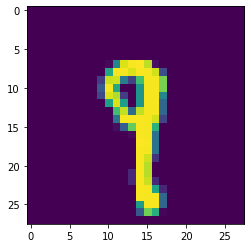

In [33]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
import matplotlib.pyplot as plt
import random

image_index = random.randint(0,60000) # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index])

In [35]:
# Load MNIST dataset
(input_train, target_train), (input_test, target_test) = mnist.load_data()

# Reshape data based on channels first / channels last strategy.
# This is dependent on whether you use TF, Theano or CNTK as backend.
# Source: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py
if K.image_data_format() == 'channels_first':
    input_train = input_train.reshape(input_train.shape[0], 1, img_width, img_height)
    input_test = input_test.reshape(input_test.shape[0], 1, img_width, img_height)
    input_shape = (1, img_width, img_height)
else:
    input_train = input_train.reshape(input_train.shape[0], img_width, img_height, 1)
    input_test = input_test.reshape(input_test.shape[0], img_width, img_height, 1)
    input_shape = (img_width, img_height, 1)

# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

In [36]:
# Add noise
pure = input_train
pure_test = input_test
noise = np.random.normal(0, 1, pure.shape)
noise_test = np.random.normal(0, 1, pure_test.shape)
noisy_input = pure + noise_factor * noise
noisy_input_test = pure_test + noise_factor * noise_test

In [37]:
# Create the model
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), kernel_constraint=max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3), kernel_constraint=max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2DTranspose(32, kernel_size=(3,3), kernel_constraint=max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2DTranspose(64, kernel_size=(3,3), kernel_constraint=max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(1, kernel_size=(3, 3), kernel_constraint=max_norm(max_norm_value), activation='sigmoid', padding='same'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 26, 26, 32)        9248      
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 1)         577       
Total params: 47,425
Trainable params: 47,425
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Compile and fit data
model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(noisy_input, pure,
                epochs=no_epochs,
                batch_size=batch_size,
                validation_split=validation_split)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 12s 259us/step - loss: 0.1255 - val_loss: 0.1059
Epoch 2/50
48000/48000 [==============================] - 9s 187us/step - loss: 0.1036 - val_loss: 0.1023
Epoch 3/50
48000/48000 [==============================] - 9s 192us/step - loss: 0.1014 - val_loss: 0.1024
Epoch 4/50
48000/48000 [==============================] - 9s 197us/step - loss: 0.1003 - val_loss: 0.1004
Epoch 5/50
48000/48000 [==============================] - 9s 197us/step - loss: 0.0995 - val_loss: 0.0996
Epoch 6/50
48000/48000 [==============================] - 9s 197us/step - loss: 0.0989 - val_loss: 0.0992
Epoch 7/50
48000/48000 [==============================] - 10s 206us/step - loss: 0.0986 - val_loss: 0.0989
Epoch 8/50
48000/48000 [==============================] - 10s 209us/step - loss: 0.0983 - val_loss: 0.0989
Epoch 9/50
48000/48000 [==============================] - 10s 211us/step - loss: 0.0980 - val_loss:

In [40]:
# Generate denoised images
samples = noisy_input_test[:number_of_visualizations]
targets = target_test[:number_of_visualizations]
denoised_images = model.predict(samples)

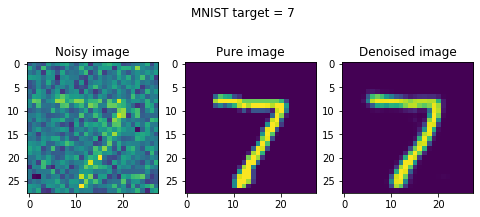

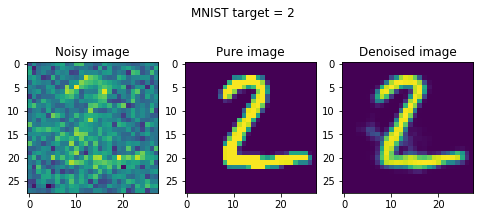

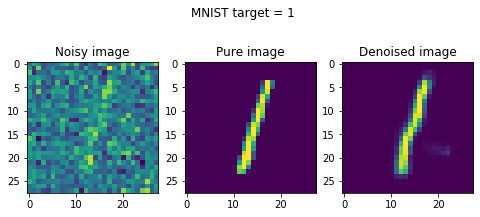

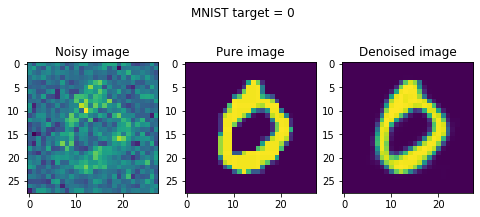

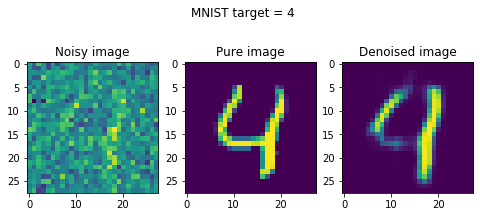

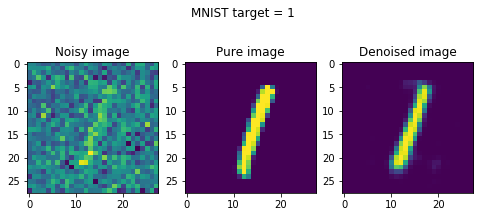

In [42]:
# Plot denoised images
for i in range(0, number_of_visualizations):
  # Get the sample and the reconstruction
  noisy_image = noisy_input_test[i][:, :, 0]
  pure_image  = pure_test[i][:, :, 0]
  denoised_image = denoised_images[i][:, :, 0]
  input_class = targets[i]
  # Matplotlib preparations
  fig, axes = plt.subplots(1, 3)
  fig.set_size_inches(8, 3.5)
  # Plot sample and reconstruciton
  axes[0].imshow(noisy_image)
  axes[0].set_title('Noisy image')
  axes[1].imshow(pure_image)
  axes[1].set_title('Pure image')
  axes[2].imshow(denoised_image)
  axes[2].set_title('Denoised image')
  fig.suptitle(f'MNIST target = {input_class}')
  plt.show()
